In [54]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import abspath
import random
import time

In [55]:
def load_data(path):
    input_file = open(path)
    output_data = []
    for line in input_file:
        one_row = line.split(',')
        output_data.append([float(x) for x in one_row])

    print('Input data info.')
    print('\tVariable amount: %d, training set size %d' % (len(output_data[0]) - 1, len(output_data)))
    return np.array(output_data)

In [56]:
def display_logistic_data(data, labels=None, decision_boundary=None):
    a_data = data[data[:, -1] == 0]
    b_data = data[data[:, -1] == 1]

    plot_regression = plt.figure().add_subplot(111)
    plot_regression.scatter(a_data[:, 0], a_data[:, 1], s=10, color='blue')
    plot_regression.scatter(b_data[:, 0], b_data[:, 1], s=10, color='red')

    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(labels[2])
    
    if decision_boundary is not None:
        plot_regression.scatter(decision_boundary[:, 0], decision_boundary[:, 1], s=3, color='black')

In [78]:
def generate_decision_boundary(theta):
    decision_boundary = []
    delta = 0.004
    for i in np.arange(-0.75, 1.5, 0.005):
        for j in np.arange(-0.75, 1.5, 0.005):
            if 0.5 - delta <= hyp_value(map_two_variables_to_polynom([i, j], 6), theta) <= 0.5 + delta:
                decision_boundary.append([i, j])
                
    return np.array(decision_boundary)

In [58]:
def display_predicted(data, theta, labels=None, decision_boundary=None):
    a_data = []
    b_data = []
    for item in data:
        if hyp_value(item, theta) > 0.5:
            a_data.append(item)
        else:
            b_data.append(item)
            
    a_data = np.array(a_data)
    b_data = np.array(b_data)

    plot_prediction = plt.figure().add_subplot(111)
    plot_prediction.scatter(a_data[:, 1], a_data[:, 2], s=10, color='green')
    plot_prediction.scatter(b_data[:, 1], b_data[:, 2], s=10, color='magenta')
    
    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(labels[2])
    
    if decision_boundary is not None:
        plot_prediction.scatter(decision_boundary[:, 0], decision_boundary[:, 1], s=3, color='black')

In [59]:
def display_all_plots():
    plt.show()

In [60]:
def compare_theta(a, b):
    delta = 0.0001
    for i in range(len(a)):
        if abs(a[i] - b[i]) > delta:
            return False

    return True

In [61]:
def display_convergence(data):
    convergence_plot_data = np.array(data)
    convergence_plot = plt.figure().add_subplot(111)
    plt.xlabel('Iteration, N')
    plt.ylabel('Cost function, J')
    plt.title('Cost function convergence')
    convergence_plot.plot(convergence_plot_data[:, 0], convergence_plot_data[:, 1])

In [62]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def hyp_value(x, theta):
    x = np.array(x)
    theta = np.array(theta)
    return sigmoid((x * theta).sum())

In [63]:
def map_two_variables_to_polynom(variables, power):
    polynom = [1]
    for i in range(1, power + 1):
        [polynom.append(variables[0] ** (i - j) * variables[1] ** j) for j in range(i+1)]

    return polynom

In [64]:
def calculate_regularize_coefficient(lm, m, theta):
    coefficient = lm / (2.0 * m)
    buf = sum(np.array(theta) * np.array(theta))
    return coefficient * buf

In [65]:
def compute_cost_function(x_data, y_data, theta, lm):
    temp_sum = 0.0
    coefficient = -1 / len(x_data)
    fake_zero = 10 ** (-9)
    
    regularize_coefficient = calculate_regularize_coefficient(lm, len(x_data), theta)
    for i in range(len(x_data) - 1):
        hyp = hyp_value(x_data[i], theta)
        temp_sum += y_data[i] * np.log(hyp if hyp != 0.0 else fake_zero) \
            + (1.0 - y_data[i]) * np.log(1 - hyp if 1 - hyp != 0.0 else fake_zero)
 
    return temp_sum * coefficient + regularize_coefficient

In [66]:
def compute_partial_derivative(x_data, y_data, theta, j, lm):
    result = 0.0
    m = len(x_data)
    reg_coefficient_for_derivative = lm * theta[j] / m 
    
    for i in range(m):
        result += (hyp_value(x_data[i], theta) - y_data[i]) * x_data[i][j]

    return result / m + reg_coefficient_for_derivative

In [67]:
def gradient_step(x, y, theta, alpha, lm):
    return [theta[i] - alpha * compute_partial_derivative(x, y, theta, i, lm) for i in range(len(theta))]

In [68]:
def gradient_descent(x_data, y_data, theta, alpha, iterations, lm):
    prev_theta = list(theta)
    convergence_plot_data = []
    for i in range(1, iterations):
        theta = gradient_step(x_data, y_data, theta, alpha, lm)
        if compare_theta(prev_theta, theta):
            print('\tEstimated iterations: %d' % i)
            break

        prev_theta = list(theta)
        convergence_plot_data.append([i, compute_cost_function(x_data, y_data, theta, lm)])
    
    if convergence_plot_data:
        display_convergence(convergence_plot_data)
    
    return theta

Input data info.
	Variable amount: 2, training set size 118
Gradient params.
	Randomly generated theta vector (first three): [0 - 0.3043] [1 - 0.0460] [2 - 0.7492] ...
	Alpha:                           2.000000
	Max iteration count:             10000

Gradient descent started...


	Estimated iterations: 267
	Estimate time: 7.91 sec
Gradient descent finished.

Generating boundary started...


	Estimate time: 5.84 sec

Generating boundary finished.


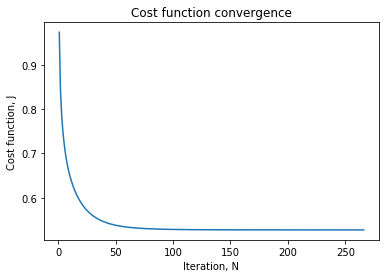

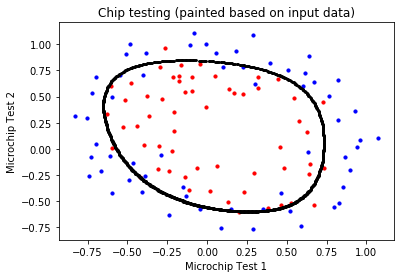

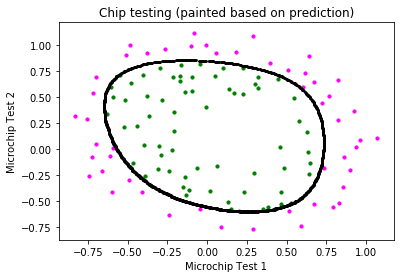

In [84]:
def compute_regularized_logistic_regression():
    data = load_data(abspath('demo\init\coursera\logisticregression\data\ex2data2.txt'))
    
    # data normalization to speed up gradient descent
    x_data = data[:, :-1]
    x_data = [map_two_variables_to_polynom(x_data[i], 6) for i in range(len(x_data))]
    y_data = data[:,  -1]
    
    theta = np.array([random.uniform(0, 1) for i in range(len(x_data[0]))])
    alpha = 2.0
    iterations = 10000
    
    # regression regularize coefficient using for solve underfitting/overfitting issue  
    # lm = 0 - overfitting error, hypothesis perfectly fit only to the training data
    # for real data this hypothesis will predict wrong prediction 
    # lm = 1 - cool decision boundary, fit to the training set, and produce probably the most fitted prediction 
    # lm = 20 - underfitting issue
    lm = 1

    print('Gradient params.')
    print('\tRandomly generated theta vector (first three): ', end='')
    [print('[%d - %.4f]' % (i, theta[i]), end=' ') for i in range(3)]
    print('...\n\tAlpha:                           %f' % alpha)
    print('\tMax iteration count:             %d' % iterations)
    
    print('\nGradient descent started...')
    start_time = time.time()
    theta = gradient_descent(x_data, y_data, theta, alpha, iterations, lm)
    end_time = time.time() - start_time
    print('\tEstimate time: %.2f sec' % end_time)
    print('Gradient descent finished.')
    
    print('\nGenerating boundary started...')
    start_time = time.time()
    decision_boundary = generate_decision_boundary(theta)
    end_time = time.time() - start_time
    print('\tEstimate time: %.2f sec' % end_time)
    print('\nGenerating boundary finished.')
    
    display_logistic_data(data, ['Microchip Test 1', 
                                 'Microchip Test 2', 
                                 'Chip testing (painted based on input data)'], decision_boundary)
    
    display_predicted(x_data, theta, ['Microchip Test 1', 
                                      'Microchip Test 2', 
                                      'Chip testing (painted based on prediction)'], decision_boundary)

compute_regularized_logistic_regression()
display_all_plots()